In [1]:
import numpy as np
import pandas as pd
from IPython import display

pd.set_option('display.max_columns',500)

# Gradient Calculation

So let's get our hands dirty and actually compute the derivative of the error function. The first thing to notice is that the sigmoid function has a really nice derivative. Namely,

$\sigma'(x)$ = $\sigma(x)$ (1-$\sigma(x)$)σ 


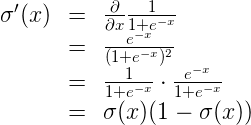

In [4]:
display.Image('./images/derivative-sigmoid.gif')

The reason for this nice derivative is the following, we can calculate it using the **quotient rule** formula.

## Quotient Rule
Let f(x) = g(x)/h(x), where both g and h are differentiable and  h(x) doe not equal zero.  Then the quotient rule is as follows:

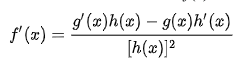

In [10]:
display.Image('./images/quotient-rule.png')


And now, let's recall that if we have m points labeled $x^{(1)}$, $x^{(2)}$, $\ldots$, $x^{(m)}$,the error formula is:

E = $-\frac{1}{m} \sum_{i=1}^m \left( y_i \ln(\hat{y_i}) + (1-y_i) \ln (1-\hat{y_i}) \right)$ 
where the prediction is given by $\hat{y_i} = \sigma(Wx^{(i)} + b)$. And $y_i$ is either 1 or 0 (for the binary classification). This is pretty cool because it maps the actual results with predicted result.

Our goal is to calculate the gradient of E, at a point $x = (x_1, \ldots, x_n),$ given by the partial derivatives

$\nabla E$ = given by the partial derivatives

$\nabla E =\left(\frac{\partial}{\partial w_1}E, \cdots, \frac{\partial}{\partial w_n}E, \frac{\partial}{\partial b}E \right)$

To simplify our calculations, we'll actually think of the error that each point produces, and calculate the derivative of this error. The total error, then, is the **average** of the errors at all the points. The error produced by each point is, simply,


E =$ - y \ln(\hat{y}) - (1-y) \ln (1-\hat{y})$

Can get the E equation by taking the log-likelihood of the bernoulli equation. (**connection between probability distribution and our error calculation**)

In order to calculate the derivative of this error with respect to the weights, we'll first calculate $\frac{\partial}{\partial w_j} \hat{y}$. Recall that $\hat{y} = \sigma(Wx+b)$, so:

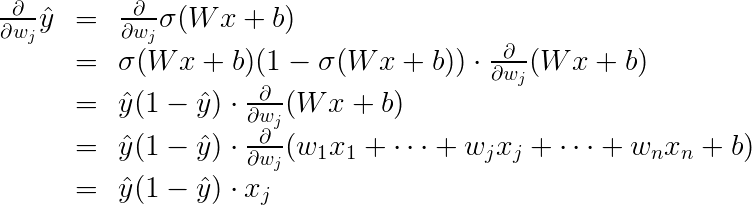

In [6]:
display.Image('./images/sigmoid-derivative2.gif')

The last equality is because the only term in the sum which is not a constant with respect to $w_j$ is precisely $w_j x_j$, which clearly has derivative $x_j$.

Now, we can go ahead and calculate the derivative of the error $E$ at a point $x$, with respect to the weight $w_j$.

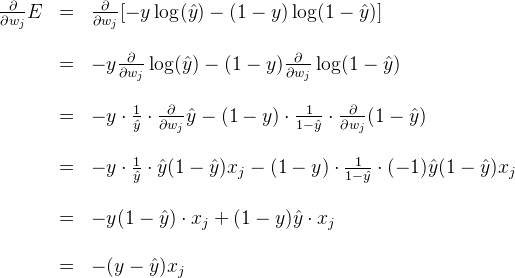

In [7]:
display.Image('./images/derivative-sigmoid3.png')

A similar calculation will show us that

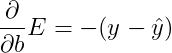

In [9]:
display.Image('./images/derivative-sigmoid4.gif')

This actually tells us something very important. For a point with coordinates $(x_1, \ldots, x_n)$, label y and prediction $\hat{y}$, the gradient of the error function at that point is $\left(-(y - \hat{y})x_1, \cdots, -(y - \hat{y})x_n, -(y - \hat{y}) \right)$. In summary, the gradient is

$\nabla E $ = $-(y - \hat{y}) (x_1, \ldots, x_n, 1)$.

If you think about it, this is fascinating. The gradient is actually a scalar times the coordinates of the point! And what is the scalar? Nothing less than a multiple of the difference between the label and the prediction. What significance does this have?

So, a small gradient means we'll change our coordinates by a little bit, and a large gradient means we'll change our coordinates by a lot.

If this sounds anything like the perceptron algorithm, this is no coincidence! We'll see it in a bit.